In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
#individuals
n = 50
#loci
m = 100


#here every matrix entree has to be zero or one, with having a f_i probability to get selected

#frequency of alleles, random uniform distribution between 0 and 1, with m samples
f_M = np.random.uniform(0,1,m)
#initialize G matrix
G = np.zeros((n, m));

# choose random SNP
loci =random.randint(0,m-1)
#frequency of that loci from our uniform distribution
f_i = f_M[loci]
#select SNP
SNP = G[:,loci]
#will be used to flip a coin based on f_i
def loci_frequency_flip(f_i):
    return random.random() < f_i

#here im "fliiping" the coin only for the SNP
for k in range(0, len(SNP)):
    if(loci_frequency_flip(f_i)):
        SNP[k] = 1

# use this if I wanted to populate entire G matrix
#k are the colums(loci)
# for k in range (0, len(G[0])):
#     # j are the rows(individuals)
#     for j in range (0, len(G)):
#         #frequency of loci k we are currently on
#         if(loci_frequency_flip(f_M[k])):
#             G[j,k] = 1
              
print(SNP)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1.]


In [3]:
from math import sqrt
import random

# mean and standard deviation
H=0
#assumes that we are making a Y_j for every individual in the SNP and 
#in each loop we choose a e_j for that person
def Simulate_Phenotype_PerPerson(SNP,var_e,var_g):
    #rows are the loci so each person has a row of different loci
    individuals = len(SNP)
    #where columns are the individuals
    mean = 0 
    #because we are given variance and python random.normal only accepts std, we need to convert variance to std
    sigma_e = sqrt(var_e)
    sigma_b = sqrt(var_g)
    #b_i = loci effect on phenotype
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1));
    for k in range(0, individuals):
        #each individual will have a random e_j value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    return Y_n,H



In [4]:
Y,H = Simulate_Phenotype_PerPerson(SNP,.1,.1)

In [5]:
#third function assumes that for each person j in M we make a phenotype Y_j
print('Phenotypes for loci '+str(loci)+' are '+str(Y))

Phenotypes for loci 2 are [[-0.29915216]
 [-0.08914222]
 [-0.12611024]
 [-0.32891195]
 [-0.22234805]
 [ 0.41765334]
 [ 0.51084321]
 [ 0.21850006]
 [-0.22073412]
 [-0.4495521 ]
 [-0.69066715]
 [-0.09878857]
 [-0.5602746 ]
 [-0.16915128]
 [-0.59396582]
 [ 0.12473813]
 [ 0.00801303]
 [ 0.38852575]
 [ 0.12278832]
 [ 0.63795357]
 [-0.08314398]
 [-0.48487714]
 [-0.29444515]
 [-0.72125091]
 [-0.13381583]
 [-0.74771322]
 [-0.08054532]
 [-0.0783648 ]
 [ 0.02276617]
 [-0.5578394 ]
 [-0.39542773]
 [ 0.0360715 ]
 [ 0.08095923]
 [-0.64844982]
 [-0.50349472]
 [-0.55202475]
 [-0.79310496]
 [-0.18001686]
 [ 0.22637315]
 [-0.00999948]
 [-0.96475929]
 [-0.99059572]
 [-0.52215335]
 [-0.27795606]
 [-0.11787588]
 [-0.04504018]
 [-0.16329195]
 [ 0.19928695]
 [-0.41592174]
 [-0.12608547]]


In [6]:
# append Y predictions to G matrix
G = np.append(G, Y, axis=1)

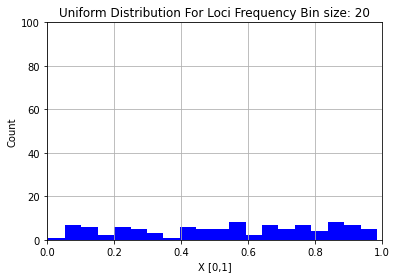

In [7]:
#use this to see distribution of f_i frequency
import matplotlib.pyplot as plt
bin_size = 20
count, bins, ignored = plt.hist(f_M, 20, facecolor='blue') 

plt.xlabel('X [0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution For Loci Frequency Bin size: "+str(bin_size))
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)